In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [45]:
ix = np.random.permutation(50)
kk = [ix[k * 5: (k + 1) * 5]
                 for k in range(10)]
kk
np.array(kk)
x.shape

(50,)

In [42]:
len(kk)

10

In [50]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_x, test_y = x[k_indices[k]], y[k_indices[k]]
    train_x, train_y = x[np.concatenate((k_indices[:k],k_indices[k+1:len(k_indices)])).reshape(-1)], y[np.concatenate((k_indices[:k],k_indices[k+1:len(k_indices)])).reshape(-1)]
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    test_data = build_poly(test_x,degree)
    train_data = build_poly(train_x,degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = ridge_regression(train_y, train_data, lambda_)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_mse(train_y, train_data, w)
    loss_te = compute_mse(test_y, test_data, w)
    
    return loss_tr, loss_te

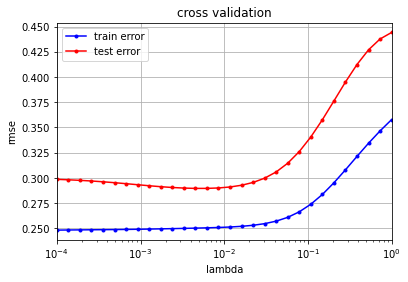

In [66]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************  
    for i in lambdas:
        loss_tr_main = []
        loss_te_main = []
        for k in range(k_fold):
            
            loss_tr, loss_te  = cross_validation(y, x, k_indices, k, i, degree)
            
            loss_tr_main.append(np.sqrt(2*loss_tr))
            loss_te_main.append(np.sqrt(2*loss_te))
            
        rmse_tr.append(np.mean(loss_tr_main))
        rmse_te.append(np.mean(loss_te_main))  

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

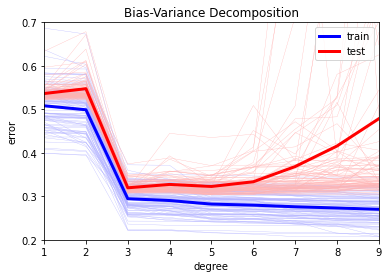

In [100]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    #print(rmse_tr.shape)
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        training_x, training_y, testing_x, testing_y = split_data(x,y,ratio_train,seed)
        #print (index_seed==seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index, degree in enumerate(degrees):
            #print (degree)
            train_pol_x, test_pol_x = build_poly(training_x,degree), build_poly(testing_x,degree)
            w, rmse_tr_inst = least_squares(training_y, train_pol_x)
            
            rmse_te_inst = np.sqrt(2*compute_mse(testing_y, test_pol_x, w))
            #print(rmse_tr_inst,rmse_te_inst)
            #print(degree,rmse_tr.shape)
            rmse_tr[index_seed,index] = (rmse_tr_inst)
            rmse_te[index_seed,index] = (rmse_te_inst)
        #raise NotImplementedError
    
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()